In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
pwd

'C:\\Users\\91843'

In [3]:
user_details = pd.read_csv('user details.csv')
cooking_sessions = pd.read_csv('cooking sessions.csv')
order_details = pd.read_csv('order details.csv')

In [4]:
print("UserDetails Head:\n", user_details.head())
print("CookingSessions Head:\n", cooking_sessions.head())
print("OrderDetails Head:\n", order_details.head())

UserDetails Head:
   User ID      User Name  Age       Location Registration Date         Phone  \
0    U001  Alice Johnson   28       New York        2023-01-15  123-456-7890   
1    U002      Bob Smith   35    Los Angeles        2023-02-20  987-654-3210   
2    U003    Charlie Lee   42        Chicago        2023-03-10  555-123-4567   
3    U004    David Brown   27  San Francisco        2023-04-05  444-333-2222   
4    U005     Emma White   30        Seattle        2023-05-22  777-888-9999   

               Email Favorite Meal  Total Orders  
0    alice@email.com        Dinner            12  
1      bob@email.com         Lunch             8  
2  charlie@email.com     Breakfast            15  
3    david@email.com        Dinner            10  
4     emma@email.com         Lunch             9  
CookingSessions Head:
   Session ID User ID        Dish Name  Meal Type     Session Start  \
0       S001    U001        Spaghetti     Dinner  2024-12-01 19:00   
1       S002    U002     Caesar

In [5]:
print("\nData Cleaning...")

print("Missing Values Before Cleaning:\n")
print(user_details.isnull().sum())
print(cooking_sessions.isnull().sum())
print(order_details.isnull().sum())

user_details.fillna('Unknown', inplace=True)
cooking_sessions.fillna(0, inplace=True)
order_details.fillna(0, inplace=True)

print("Missing Values After Cleaning:\n")
print(user_details.isnull().sum())
print(cooking_sessions.isnull().sum())
print(order_details.isnull().sum())


Data Cleaning...
Missing Values Before Cleaning:

User ID              0
User Name            0
Age                  0
Location             0
Registration Date    0
Phone                0
Email                0
Favorite Meal        0
Total Orders         0
dtype: int64
Session ID         0
User ID            0
Dish Name          0
Meal Type          0
Session Start      0
Session End        0
Duration (mins)    0
Session Rating     0
dtype: int64
Order ID        0
User ID         0
Order Date      0
Meal Type       0
Dish Name       0
Order Status    0
Amount (USD)    0
Time of Day     0
Rating          2
Session ID      0
dtype: int64
Missing Values After Cleaning:

User ID              0
User Name            0
Age                  0
Location             0
Registration Date    0
Phone                0
Email                0
Favorite Meal        0
Total Orders         0
dtype: int64
Session ID         0
User ID            0
Dish Name          0
Meal Type          0
Session Start      

In [6]:
print("\nMerging Data...")
data_merged = pd.merge(cooking_sessions, order_details, on='User ID', how='inner')
data_merged = pd.merge(data_merged, user_details, on='User ID', how='inner')

print("Merged Data Head:\n", data_merged.head())


Merging Data...
Merged Data Head:
   Session ID_x User ID Dish Name_x Meal Type_x     Session Start  \
0         S001    U001   Spaghetti      Dinner  2024-12-01 19:00   
1         S001    U001   Spaghetti      Dinner  2024-12-01 19:00   
2         S001    U001   Spaghetti      Dinner  2024-12-01 19:00   
3         S004    U001    Pancakes   Breakfast  2024-12-02 07:30   
4         S004    U001    Pancakes   Breakfast  2024-12-02 07:30   

        Session End  Duration (mins)  Session Rating  Order ID  Order Date  \
0  2024-12-01 19:30               30             4.5      1001  2024-12-01   
1  2024-12-01 19:30               30             4.5      1004  2024-12-02   
2  2024-12-01 19:30               30             4.5      1009  2024-12-05   
3  2024-12-02 08:00               30             4.2      1001  2024-12-01   
4  2024-12-02 08:00               30             4.2      1004  2024-12-02   

   ... Rating Session ID_y      User Name  Age  Location  Registration Date  \
0  ... 

In [7]:
print("\nAnalyzing Relationship Between Cooking Sessions and User Orders...")
relation = data_merged.groupby('User ID')['Order ID'].count()
print("Cooking Sessions vs Orders:\n", relation.describe())


Analyzing Relationship Between Cooking Sessions and User Orders...
Cooking Sessions vs Orders:
 count    8.0000
mean     4.7500
std      3.7321
min      1.0000
25%      1.0000
50%      4.0000
75%      9.0000
max      9.0000
Name: Order ID, dtype: float64


In [8]:
# Most ordered dishes
popular_dishes = order_details['Dish Name'].value_counts()
print(popular_dishes.head(10))

Dish Name
Spaghetti          4
Grilled Chicken    4
Caesar Salad       3
Pancakes           2
Veggie Burger      2
Oatmeal            1
Name: count, dtype: int64


In [9]:
print("\nExploring Demographic Factors...")
# Group by age and calculate average order count
demographics = data_merged.groupby('Age')['Order ID'].mean()
print(demographics)


Exploring Demographic Factors...
Age
25    1014.000000
27    1008.500000
28    1004.666667
30    1010.000000
31    1016.000000
35    1006.000000
38    1015.000000
42    1007.333333
Name: Order ID, dtype: float64



Generating Visualizations...


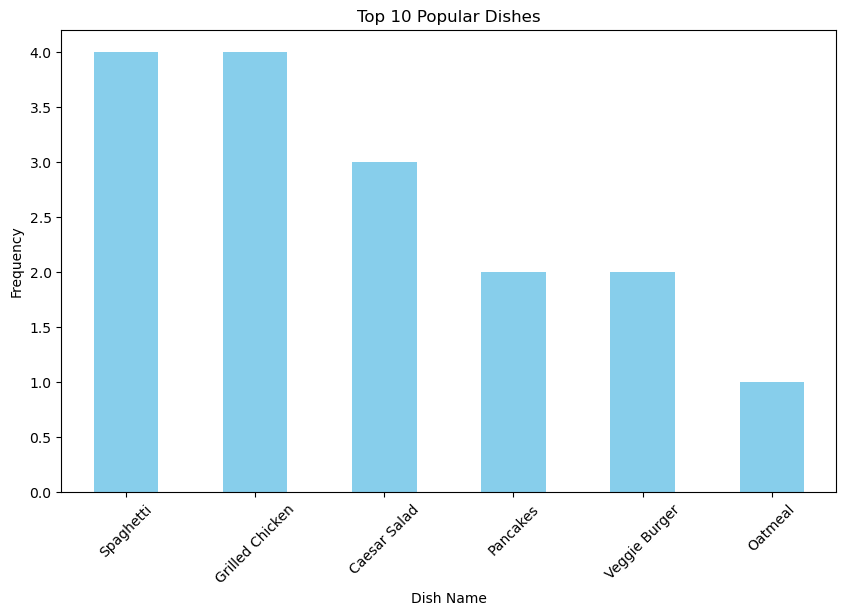

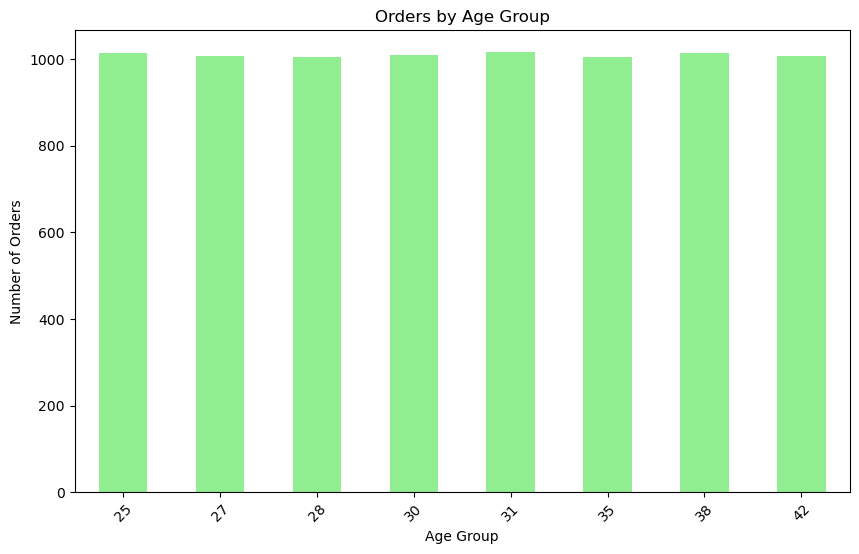

In [10]:
print("\nGenerating Visualizations...")

plt.figure(figsize=(10, 6))
popular_dishes.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Popular Dishes')
plt.xlabel('Dish Name')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
demographics.plot(kind='bar', color='lightgreen')
plt.title('Orders by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

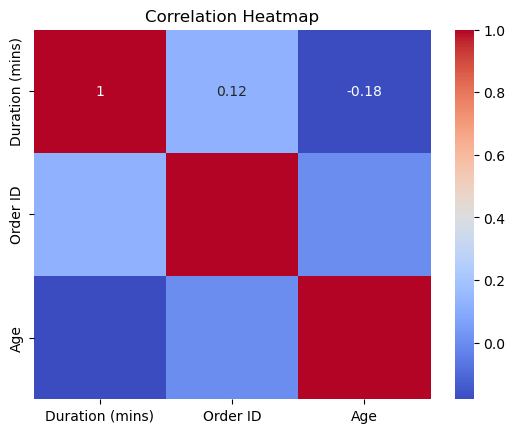

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
correlation = data_merged[['Duration (mins)', 'Order ID', 'Age']].corr()
sns.heatmap( correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [12]:
data_merged.to_csv('Cleaned_Data.csv', index=False)
print("Data saved successfully!")


Data saved successfully!
